In [20]:
import pandas as pd
import numpy as np
import plotly.express as px



In [2]:
df = pd.read_csv('../Data/aggrigated_data.csv', index_col='BFS-Nr')

In [7]:
df.columns

Index(['Gemeindename', 'GeoLocation', 'Ladestationen', 'EV_Bestand_2010',
       'EV_Bestand_2011', 'EV_Bestand_2012', 'EV_Bestand_2013',
       'EV_Bestand_2014', 'EV_Bestand_2015', 'EV_Bestand_2016',
       'EV_Bestand_2017', 'EV_Bestand_2018', 'EV_Bestand_2019',
       'EV_Bestand_2020', 'EV_Bestand_2021', 'Strassenlänge(km)',
       'Anz.Einwohner', 'Einwohner_Veränderung_2010-2019_(%)',
       'Bevölkerungsdichte_pro_km2', 'Ausländeranteil',
       'Altersverteilung:_0-19', 'Altersverteilung:_20-64',
       'Altersverteilung:_65+', 'Rohe_Heiratsziffer', 'Rohe_Scheidungsziffer',
       'Rohe_Geburtenziffer', 'Rohe_Sterbeziffer', 'Anz.Privathaushalte',
       'Durchschn.Haushaltsgrösse', 'Gesamtfläche(km2)', 'Siedlungsfläche(%)',
       'Siedlungsfläche_Veränderung(ha)', 'Landwirtschaftsfläche(%)',
       'Landwirschaftsfläche_Veränderung(ha)', 'Wald&Gehölze(%)',
       'Unproduktive_Fläche(%)', 'Beschäftigte_total', 'Beschäftigte_1.Sektor',
       'Beschäftigte_2.Sektor', 'Beschäft

In [18]:
EV_df = df[['Gemeindename','EV_Bestand_2010', 'EV_Bestand_2011', 'EV_Bestand_2012', 'EV_Bestand_2013', 'EV_Bestand_2014', 'EV_Bestand_2015', 'EV_Bestand_2016', 'EV_Bestand_2017', 'EV_Bestand_2018', 'EV_Bestand_2019', 'EV_Bestand_2020', 'EV_Bestand_2021']]

In [ ]:
melt_df = EV_df.melt(id_vars=['Gemeindename'],var_name='year',value_name='anzahl EV')

In [36]:
melt_df

,Gemeindename,year,Anzahl EV
0,Aeugst am Albis,EV_Bestand_2010,0.0
1,Affoltern am Albis,EV_Bestand_2010,0.0
2,Bonstetten,EV_Bestand_2010,1.0
3,Hausen am Albis,EV_Bestand_2010,1.0
4,Hedingen,EV_Bestand_2010,0.0
...,...,...,...
25759,Vendlincourt,EV_Bestand_2021,3.0
25760,Basse-Allaine,EV_Bestand_2021,9.0
25761,Clos du Doubs,EV_Bestand_2021,9.0
25762,Haute-Ajoie,EV_Bestand_2021,2.0


In [22]:
melt_df = EV_df.melt(id_vars=['Gemeindename'])


In [26]:
melt_df['variable'] = melt_df.apply(lambda x: x['variable'].replace('EV_Bestand_',''),axis=1)

In [32]:
filtered = melt_df[melt_df['Gemeindename'].isin(['Biberist','Bolken'])]

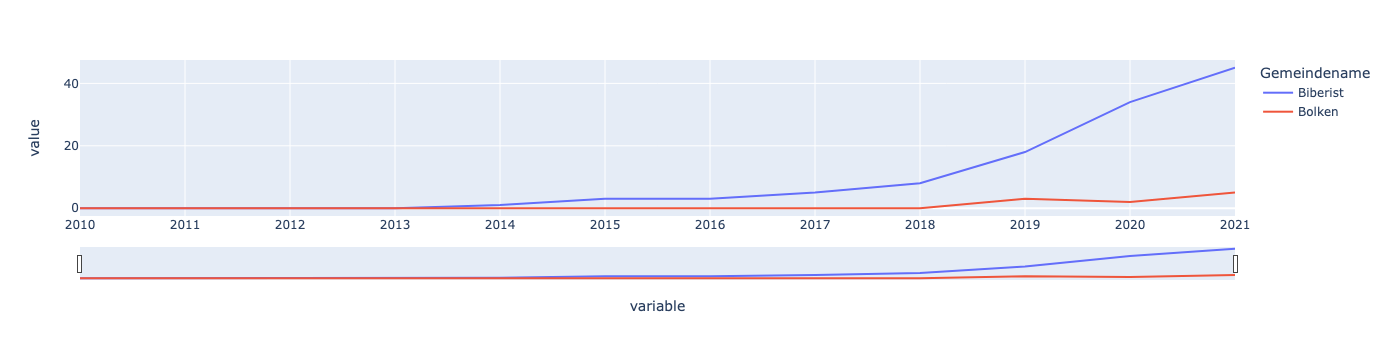

In [33]:
fig = px.line(filtered, x="variable", y="value", color='Gemeindename')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [6]:
loc =df[df['Gemeindename'].isin(['Zürich'])]

In [13]:
(loc['Ladestationen'] - df['Ladestationen'].mean()).values[0]

218.0

In [19]:
df['Ladestationen'].mean()

4.259897531439218